In [1]:
import sys

sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

from defences.baard import (ApplicabilityStage, DecidabilityStage,
                            ReliabilityStage)

In [2]:
# Create mesh
xx, yy = np.meshgrid(
    np.arange(-0.1, 1.1, 0.01), 
    np.arange(-0.1, 1.1, 0.01))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
print(X_mesh.shape)

(14641, 2)


In [3]:
def run_stage(stage, X, y, pred):
    stage.fit(X, y)
    stage.search_thresholds(X, y, np.zeros_like(y))

    output = stage.predict(X_mesh, pred)
    print('Block rate: {:.2f}'.format(np.sum(output) / output.shape[0]))

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    # plt.contourf(xx, yy, pred.reshape(xx.shape), cmap='coolwarm', alpha=0.8)
    plt.contourf(xx, yy, output.reshape(xx.shape), cmap='coolwarm', alpha=0.8)
    plt.show()

    return output

In [4]:
def run_baard(file_name, adv='pred'):
    df = pd.read_csv(file_name, header=None)
    data = df.to_numpy()
    X = data[:,:2]
    y = data[:,2].astype(np.int)

    model = SVC(C=10000)
    model.fit(X, y)
    pred = model.predict(X_mesh)

    # Decision boundary of SVM
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plt.contourf(xx, yy, pred.reshape(xx.shape), cmap='coolwarm', alpha=0.6)
    plt.show()

    if adv == 'pred':
        pred = pred
    else:
        pred = adv * np.ones_like(pred)
    reject1 = run_stage(ApplicabilityStage(2, fpr=0.01, verbose=False), X, y, pred)
    reject2 = run_stage(ReliabilityStage(2, k=2, fpr=0.01, verbose=False), X, y, pred)
    reject3 = run_stage(DecidabilityStage(2, k=10, fpr=0.01, verbose=False), X, y, pred)

    data = {
        'x1': X_mesh[:,0],
        'x2': X_mesh[:,1],
        'pred': pred,
        'applicability': reject1,
        'reliability': reject2,
        'decidability': reject3,
    }
    df = pd.DataFrame(data)
    df.to_csv('{}_{}.csv'.format(file_name, adv))

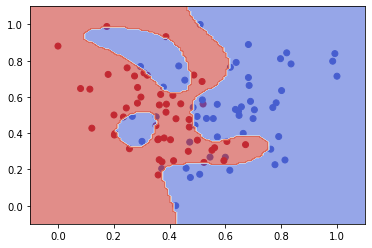

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.06


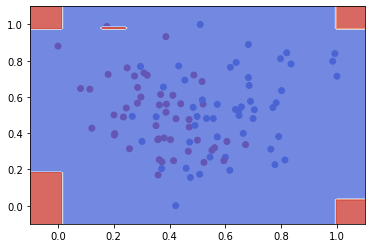

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.59


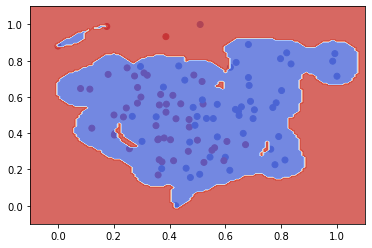

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.03


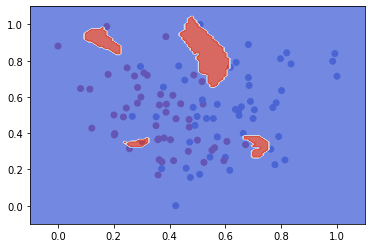

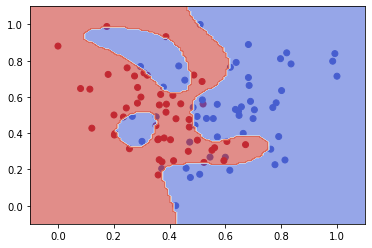

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.09


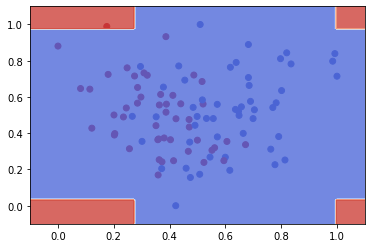

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.68


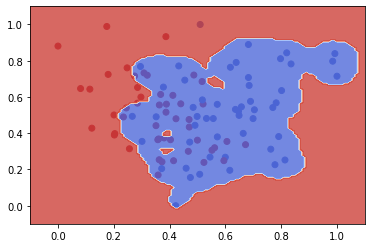

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.16


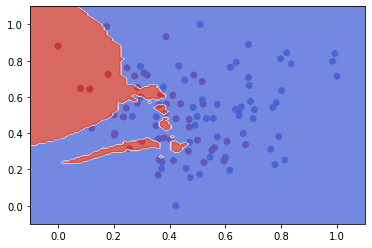

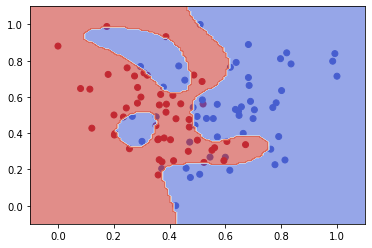

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.16


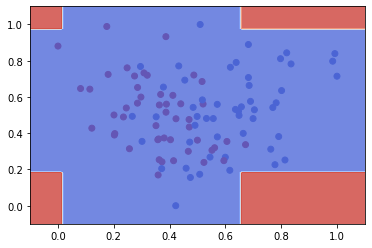

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.74


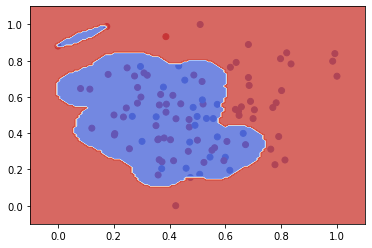

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.46


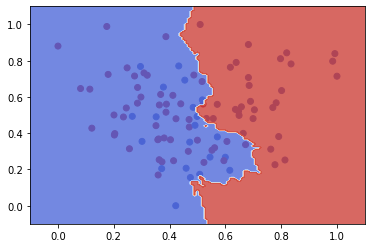

In [5]:
run_baard('d1.csv')
run_baard('d1.csv', 0)
run_baard('d1.csv', 1)

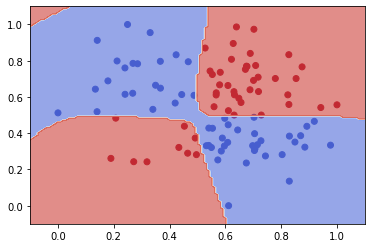

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.11


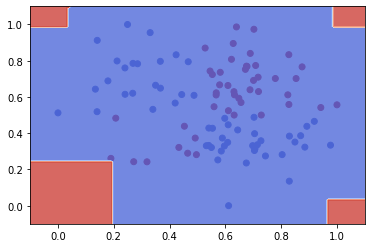

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.56


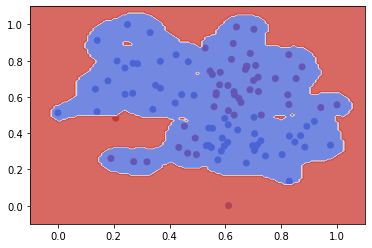

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.02


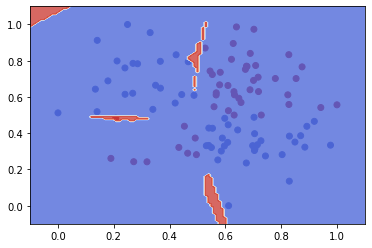

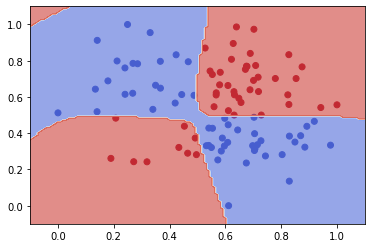

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.05


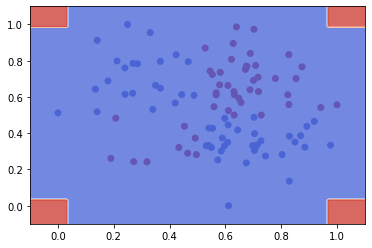

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.71


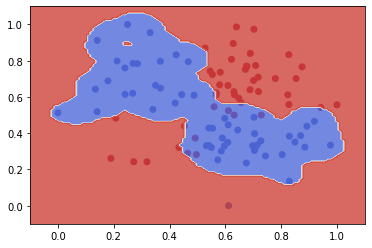

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.33


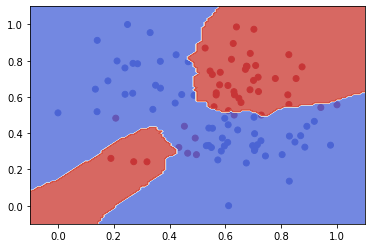

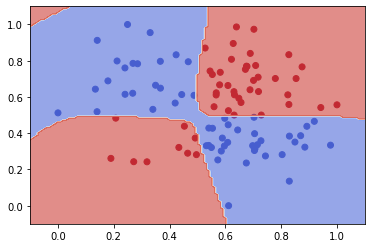

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.08
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0
Block rate: 0.13


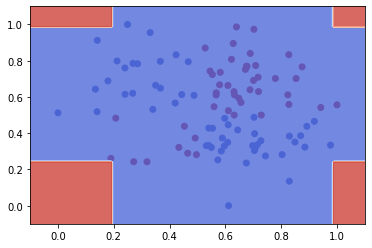

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.79


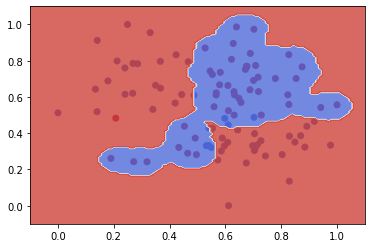

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.43


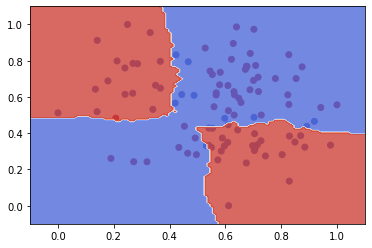

In [6]:
run_baard('d2.csv')
run_baard('d2.csv', 0)
run_baard('d2.csv', 1)

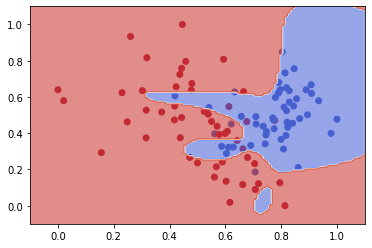

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.06


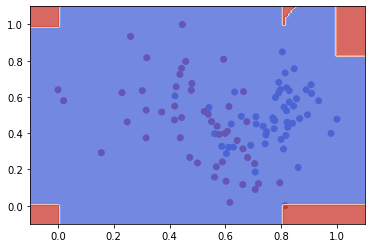

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.65


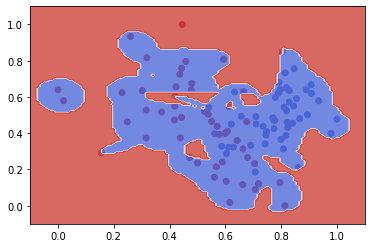

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.02


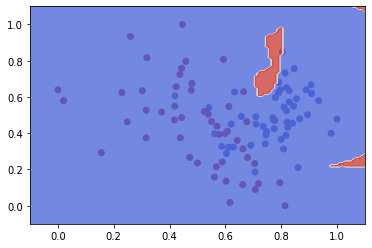

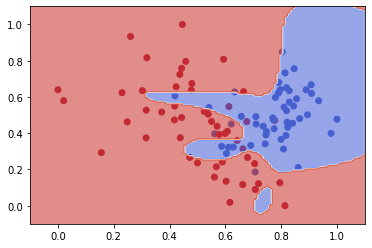

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.26


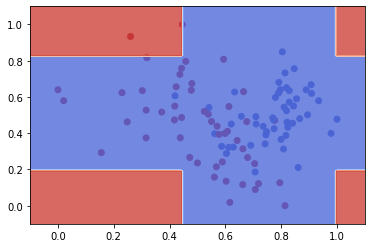

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.86


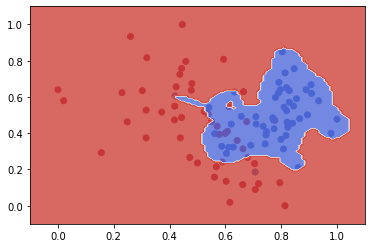

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.38


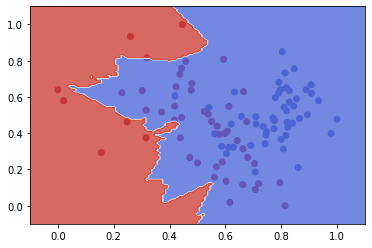

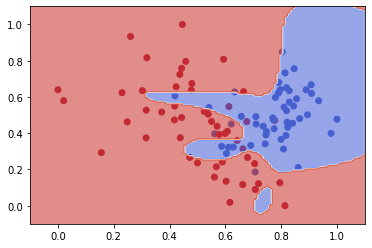

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.06


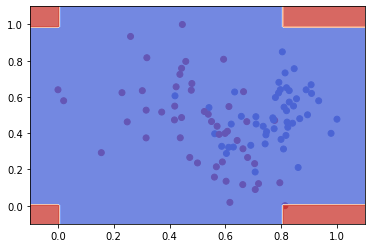

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.71


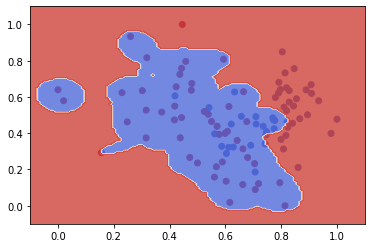

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.20


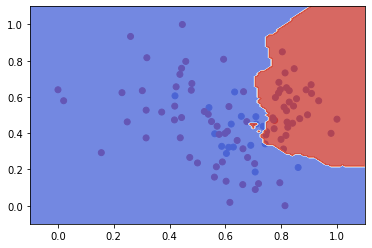

In [7]:
run_baard('d3.csv')
run_baard('d3.csv', 0)
run_baard('d3.csv', 1)

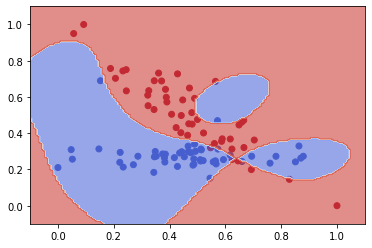

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.08


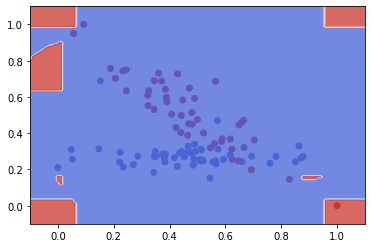

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.68


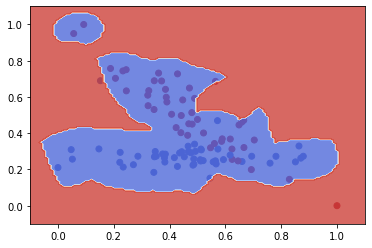

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.07


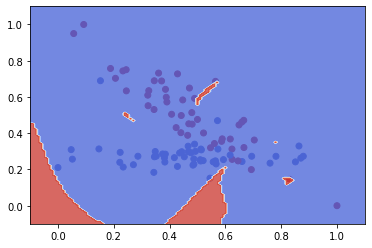

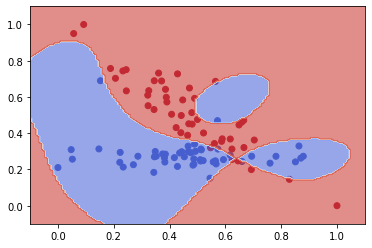

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.18


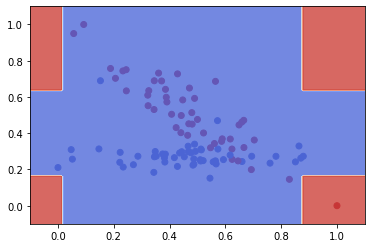

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.76


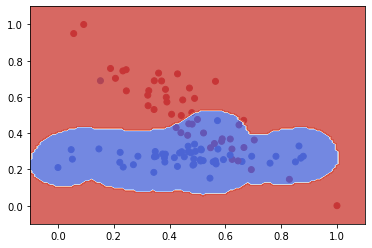

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.20


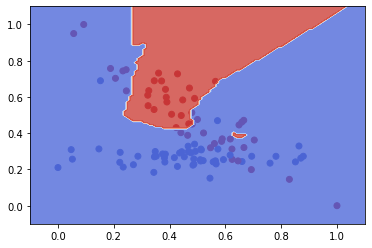

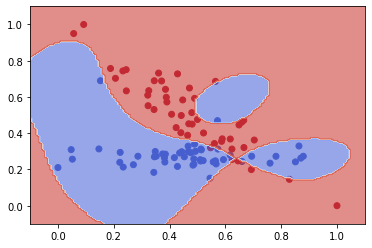

[BAARD] s1 self.fpr: 0.01
[BAARD] s1 eval. fpr (only thresholds): 0.07
[BAARD] s1 tolerance: [1 1]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.01
Block rate: 0.06


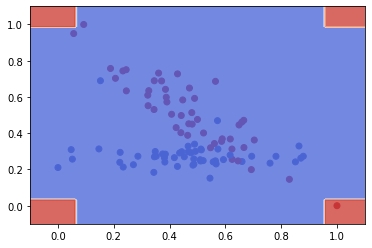

[BAARD] s2 eval. fpr: 0.02
Block rate: 0.80


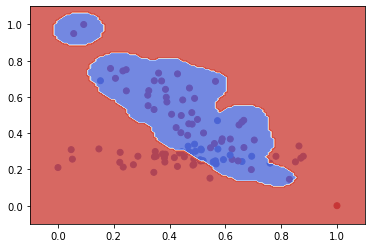

[BAARD] s3 eval. fpr: 0.01
Block rate: 0.25


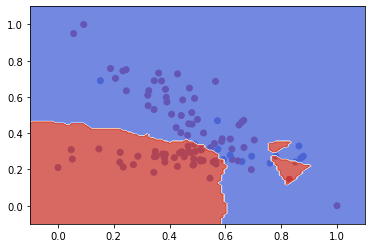

In [8]:
run_baard('d4.csv')
run_baard('d4.csv', 0)
run_baard('d4.csv', 1)